In [1]:
import tensorflow as tf 
physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)

IndexError: list index out of range

In [2]:
#pip install tensorflow-addons

In [3]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import operator
import tensorflow as tf
import random
from keras.preprocessing.image import ImageDataGenerator

In [4]:
'''
import skimage
from skimage.io import imread,imshow
path = r'D:\new_leuk\Leukemia_Work_Revive\Autoencoder oversample data\val\all'

im_list = os.listdir(path)
len(im_list)

for x in range(len(im_list)):
    im = imread(os.path.join(path, im_list[x]))
    maxi = np.max(im)
    mini = np.min(im)
    if str(im.dtype) != 'uint8':
        print(path+im_list[x])
'''

"\nimport skimage\nfrom skimage.io import imread,imshow\npath = r'D:\new_leuk\\Leukemia_Work_Revive\\Autoencoder oversample data\x0bal\x07ll'\n\nim_list = os.listdir(path)\nlen(im_list)\n\nfor x in range(len(im_list)):\n    im = imread(os.path.join(path, im_list[x]))\n    maxi = np.max(im)\n    mini = np.min(im)\n    if str(im.dtype) != 'uint8':\n        print(path+im_list[x])\n"

In [5]:
'''
TRAIN_PATH = r'D:\new_leuk\Leukemia_Work_Revive\Corrected\Autoencoder oversampe data\train'
VAL_PATH = r'D:\new_leuk\Leukemia_Work_Revive\Corrected\Autoencoder oversampe data\val'
BATCH_SIZE=10
r = 4
c = 4
'''

'''
TRAIN_PATH = r'D:\new_leuk\Leukemia_Work_Revive\Corrected\Aug_5x\train'
VAL_PATH = r'D:\new_leuk\Leukemia_Work_Revive\Corrected\Aug_5x\val'
BATCH_SIZE=10
r = 4
c = 4
'''
# 10xAug 210 x 210 x 3
#'''
TRAIN_PATH = r'D:\new_leuk\Leukemia_Work_Revive\Corrected\Aug_10x\train'
VAL_PATH = r'D:\new_leuk\Leukemia_Work_Revive\Corrected\Aug_10x\val'
BATCH_SIZE=4
r = 2
c = 2
#'''

'''
TRAIN_PATH = r'D:\new_leuk\Leukemia_Work_Revive\Corrected\Oversampled minority class\train'
VAL_PATH = r'D:\new_leuk\Leukemia_Work_Revive\Corrected\Oversampled minority class\val'
BATCH_SIZE=10
r = 4
c = 4
'''

'''
TRAIN_PATH = r'D:\new_leuk\Leukemia_Work_Revive\Corrected\Originall data\train'
VAL_PATH = r'D:\new_leuk\Leukemia_Work_Revive\Corrected\Originall data\val'
BATCH_SIZE=4
r = 2
c = 2
'''


'''
TRAIN_PATH = r'D:\new_leuk\Leukemia_Work_Revive\Corrected\CycleGanOverSampled Data\train'
VAL_PATH = r'D:\new_leuk\Leukemia_Work_Revive\Corrected\CycleGanOverSampled Data\val'
BATCH_SIZE=4
r = 2
c = 2
'''


"\nTRAIN_PATH = r'D:\new_leuk\\Leukemia_Work_Revive\\Corrected\\CycleGanOverSampled Data\train'\nVAL_PATH = r'D:\new_leuk\\Leukemia_Work_Revive\\Corrected\\CycleGanOverSampled Data\x0bal'\nBATCH_SIZE=4\nr = 2\nc = 2\n"

In [6]:
def crop_center(img, bounding):
    start = tuple(map(lambda a, da: a//2-da//2, img.shape, bounding))
    end = tuple(map(operator.add, start, bounding))
    slices = tuple(map(slice, start, end))
    im = img[slices].astype('float32')
    return im


def crop_generator(batches, crop_length):
    while True:
        batch_x, batch_y = next(batches)
        batch_crops = np.zeros((batch_x.shape[0], crop_length, crop_length, 3))
        for i in range(batch_x.shape[0]):
            batch_crops[i] = crop_center(batch_x[i], (crop_length, crop_length))
        yield (batch_crops, batch_y)

In [7]:
#'''
train_datagen = ImageDataGenerator(rescale=1.0/255.0)
train_batches = train_datagen.flow_from_directory(TRAIN_PATH,
                                                  class_mode='binary', 
                                                  color_mode="rgb", 
                                                  batch_size=BATCH_SIZE, 
                                                  target_size=(210, 210),
                                                  shuffle=True,
                                                  seed=42
                                                  )

train_crops = crop_generator(train_batches, 150)
#'''
'''

train_datagen = ImageDataGenerator(rescale=1.0/255.0)
train_batches = train_datagen.flow_from_directory(TRAIN_PATH,
                                                  class_mode='binary', 
                                                  color_mode="rgb", 
                                                  batch_size=BATCH_SIZE, 
                                                  target_size=(210, 210),
                                                  shuffle=True,
                                                  seed=42
                                                  )
'''

Found 44551 images belonging to 2 classes.


'\n\ntrain_datagen = ImageDataGenerator(rescale=1.0/255.0)\ntrain_batches = train_datagen.flow_from_directory(TRAIN_PATH,\n                                                  class_mode=\'binary\', \n                                                  color_mode="rgb", \n                                                  batch_size=BATCH_SIZE, \n                                                  target_size=(210, 210),\n                                                  shuffle=True,\n                                                  seed=42\n                                                  )\n'

'\ntrain_batches\nx , y = next(train_batches)\nprint(x.shape)\nplt.figure(figsize=(15,15))\ni=0\nfor img in x:\n    plt.subplot(r,c,i+1)\n    plt.imshow(img)\n    i+=1\n'

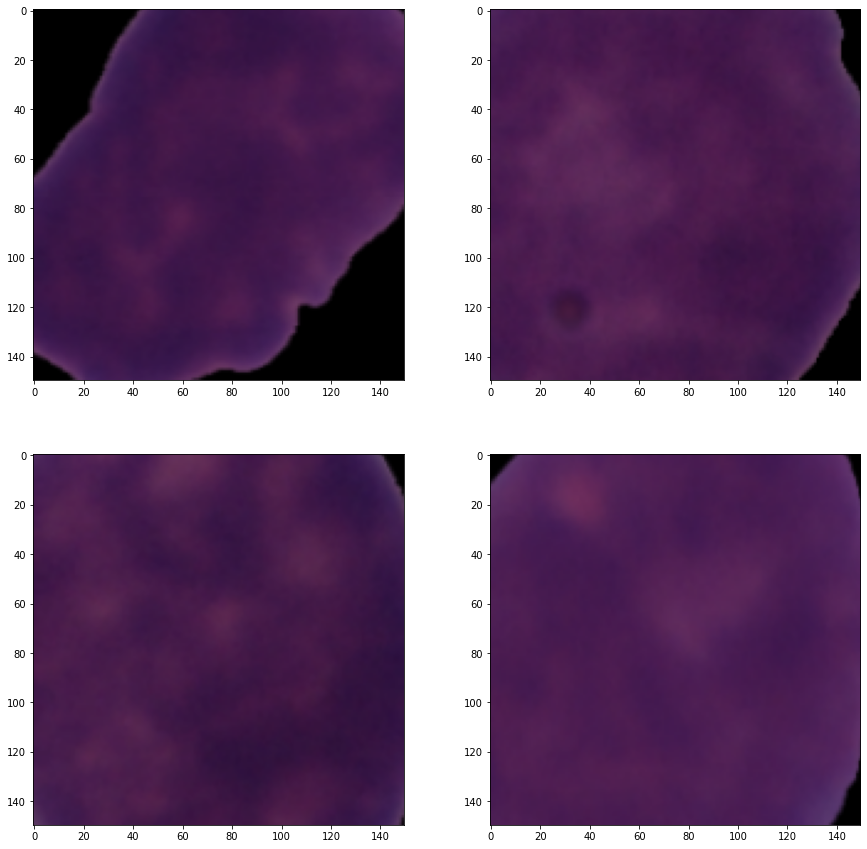

In [8]:
#'''
train_crops
x , y = next(train_crops)
plt.figure(figsize=(15,15))
i=0
for img in x:
    plt.subplot(r,c,i+1)
    plt.imshow(img)
    i+=1
#'''


'''
train_batches
x , y = next(train_batches)
print(x.shape)
plt.figure(figsize=(15,15))
i=0
for img in x:
    plt.subplot(r,c,i+1)
    plt.imshow(img)
    i+=1
'''

In [9]:
#'''
val_datagen = ImageDataGenerator(rescale=1.0/255.0)
val_batches = val_datagen.flow_from_directory(VAL_PATH,
                                                class_mode='binary', 
                                                color_mode="rgb", 
                                                batch_size=BATCH_SIZE, 
                                                target_size=(210, 210),
                                                shuffle=True,
                                                seed=42
                                                )

val_crops = crop_generator(val_batches, 150)
#'''
'''

val_datagen = ImageDataGenerator(rescale=1.0/255.0)
val_batches = val_datagen.flow_from_directory(VAL_PATH,
                                                class_mode='binary', 
                                                color_mode="rgb", 
                                                batch_size=BATCH_SIZE, 
                                                target_size=(210, 210),
                                                shuffle=True,
                                                seed=42
                                                )
'''

Found 1867 images belonging to 2 classes.


'\n\nval_datagen = ImageDataGenerator(rescale=1.0/255.0)\nval_batches = val_datagen.flow_from_directory(VAL_PATH,\n                                                class_mode=\'binary\', \n                                                color_mode="rgb", \n                                                batch_size=BATCH_SIZE, \n                                                target_size=(210, 210),\n                                                shuffle=True,\n                                                seed=42\n                                                )\n'

'\nval_batches\nx , y = next(val_batches)\nprint(x.shape)\nplt.figure(figsize=(15,15))\ni=0\nfor img in x:\n    plt.subplot(r,c,i+1)\n    plt.imshow(img)\n    i+=1\n'

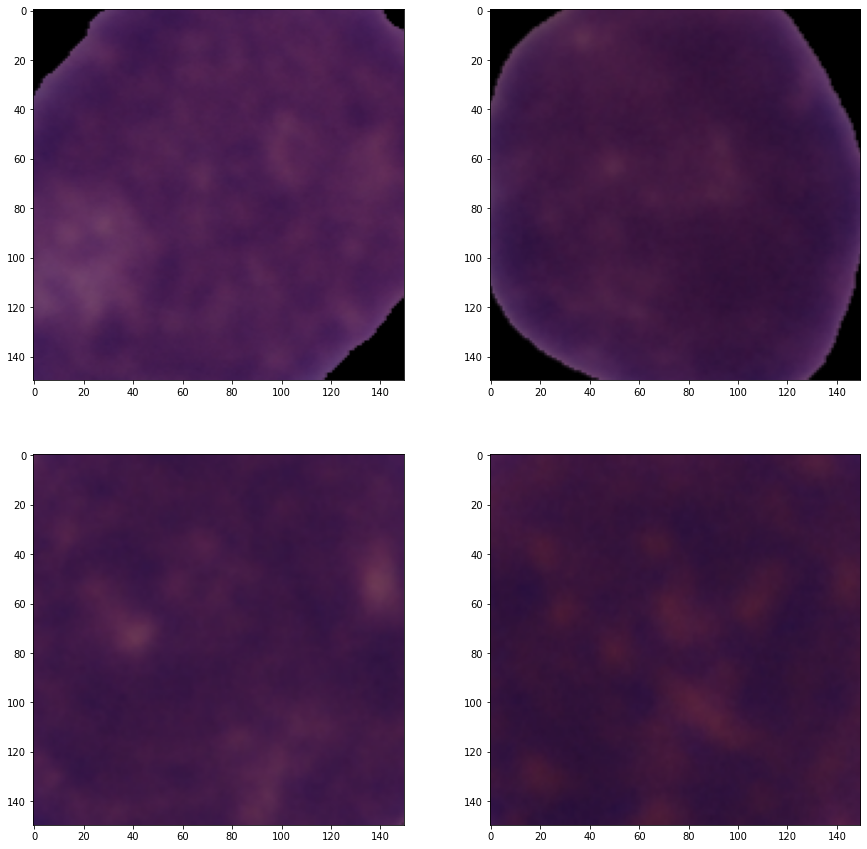

In [10]:
#'''
val_crops
x , y = next(val_crops)
plt.figure(figsize=(15,15))
i=0
for img in x:
    plt.subplot(r,c,i+1)
    plt.imshow(img)
    i+=1
#'''

'''
val_batches
x , y = next(val_batches)
print(x.shape)
plt.figure(figsize=(15,15))
i=0
for img in x:
    plt.subplot(r,c,i+1)
    plt.imshow(img)
    i+=1
'''

In [11]:
'''
import tensorflow as tf

resnet = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(224,224,3)),
    tf.keras.applications.ResNet50(
        weights='imagenet', 
        input_shape=(224,224,3),
        pooling="avg",
        classifier_activation=None
        )
    ])
'''

'\nimport tensorflow as tf\n\nresnet = tf.keras.Sequential([\n    tf.keras.layers.Input(shape=(224,224,3)),\n    tf.keras.applications.ResNet50(\n        weights=\'imagenet\', \n        input_shape=(224,224,3),\n        pooling="avg",\n        classifier_activation=None\n        )\n    ])\n'

In [12]:
'''
#import tensorflow.keras as keras
#import tensorflow.keras as keras
from tensorflow.keras.applications import VGG16
model = VGG16(
    include_top=True,
    weights=None,
    input_tensor=None,
    input_shape=(210,210,3),
    pooling=None,
    classes=2,
    classifier_activation='softmax'
)
model.summary()
'''

"\n#import tensorflow.keras as keras\n#import tensorflow.keras as keras\nfrom tensorflow.keras.applications import VGG16\nmodel = VGG16(\n    include_top=True,\n    weights=None,\n    input_tensor=None,\n    input_shape=(210,210,3),\n    pooling=None,\n    classes=2,\n    classifier_activation='softmax'\n)\nmodel.summary()\n"

In [13]:
from keras.models import Model, Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers import Input, GlobalAveragePooling2D

'''
import tensorflow as tf
base_model = tf.keras.applications.VGG16(  
    include_top=False,
    weights='imagenet',
    input_tensor=None,
    input_shape=(150,150,3),
    pooling=None,
    classes=1,
    classifier_activation="sigmoid",
)
x = base_model.output
x = Flatten()(x)
x = Dense(4096, activation=tf.nn.sigmoid)(x)
x = Dense(4096, activation=tf.nn.sigmoid)(x)
prediction = Dense(1, activation=tf.nn.sigmoid)(x)

model = Model(inputs=base_model.input,outputs=prediction)

model.summary()
'''

#'''
import tensorflow as tf
base_model = tf.keras.applications.ResNet50(
    include_top=False,
    weights='imagenet',
    input_tensor=None,
    input_shape=(150,150,3),
    pooling=None,
    classes=1,
    classifier_activation="sigmoid",
)
x = base_model.output
x = GlobalAveragePooling2D()(x)
prediction = Dense(1, activation=tf.nn.sigmoid)(x)

model = Model(inputs=base_model.input,outputs=prediction)

model.summary()
#'''


'''
import tensorflow as tf
model = tf.keras.applications.ResNet50(
    include_top=True,
    weights='imagenet',
    input_tensor=None,
    input_shape=(150,150,3),
    pooling=None,
    classes=1,
    classifier_activation="sigmoid",
)
model.summary()
'''

'''
import os
import numpy as np
np.random.seed(777)

from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam, SGD, RMSprop

from keras.models import Model, Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers import Input, GlobalAveragePooling2D

from keras.regularizers import l2
from keras.models import load_model

import matplotlib.pyplot as plt
%matplotlib inline


from keras.applications import DenseNet121

base_model = DenseNet121(weights=None, 
                         include_top=False, 
                         input_tensor=None,
                         input_shape=(210,210,3),
                        )
x = base_model.output
x = GlobalAveragePooling2D()(x)
# x = Dense(1024, kernel_regularizer=l2(0.0001), bias_regularizer=l2(0.0001))(x)
# x = BatchNormalization()(x)
# x = Activation("relu")(x)
# x = Dropout(0.5)(x)
# x = Dense(512, kernel_regularizer=l2(0.0001), bias_regularizer=l2(0.0001))(x)
# x = BatchNormalization()(x)
# x = Activation("relu")(x)
# x = Dropout(0.5)(x)
prediction = Dense(1, activation=tf.nn.sigmoid)(x)

model = Model(inputs=base_model.input,outputs=prediction)
model.summary()
'''

'''
model = tf.keras.applications.EfficientNetB0(
    include_top=True,
    weights=None,
    input_tensor=None,
    input_shape=(150,150,3),
    pooling=None,
    classes=1,
    classifier_activation="sigmoid",
)
model.summary()
'''

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 156, 156, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 75, 75, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 75, 75, 64)   256         conv1_conv[0][0]                 
_______________________________________________________________________________________

'\nmodel = tf.keras.applications.EfficientNetB0(\n    include_top=True,\n    weights=None,\n    input_tensor=None,\n    input_shape=(150,150,3),\n    pooling=None,\n    classes=1,\n    classifier_activation="sigmoid",\n)\nmodel.summary()\n'

In [14]:
'''
import keras
from keras.layers import Input, Activation, merge, Dense, Flatten, Dropout, BatchNormalization, GlobalAveragePooling2D

def effnet():
    # build model
    base_model = tf.keras.applications.EfficientNetB0(input_shape=(150,150,3), weights='imagenet', include_top=False)
    
    # add GAP layer and 2-ways softmax
    x = keras.layers.GlobalAveragePooling2D()(base_model.output)
    output = keras.layers.Dense(2, activation='sigmoid')(x)
    
    model = keras.models.Model(inputs=[base_model.input], outputs=[output])
    #model.compile(optimizer='SGD', loss=f1_loss, metrics=['accuracy'] )
    return model


model=None
model=effnet()
model.summary()
'''

"\nimport keras\nfrom keras.layers import Input, Activation, merge, Dense, Flatten, Dropout, BatchNormalization, GlobalAveragePooling2D\n\ndef effnet():\n    # build model\n    base_model = tf.keras.applications.EfficientNetB0(input_shape=(150,150,3), weights='imagenet', include_top=False)\n    \n    # add GAP layer and 2-ways softmax\n    x = keras.layers.GlobalAveragePooling2D()(base_model.output)\n    output = keras.layers.Dense(2, activation='sigmoid')(x)\n    \n    model = keras.models.Model(inputs=[base_model.input], outputs=[output])\n    #model.compile(optimizer='SGD', loss=f1_loss, metrics=['accuracy'] )\n    return model\n\n\nmodel=None\nmodel=effnet()\nmodel.summary()\n"

In [15]:
'''from keras.models import Model, Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers import Input, GlobalAveragePooling2D
def get_model():
    base_model = tf.keras.applications.EfficientNetB0(
        include_top=False,
        weights='imagenet',
        input_tensor=None,
        input_shape=(150,150,3),
        pooling=None,
        classes=1,
        classifier_activation="sigmoid",
    )
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.5)(x)
    prediction = Dense(1, activation=tf.nn.sigmoid)(x)

    model = Model(inputs=base_model.input,outputs=prediction)
    #model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
model = get_model()
model.summary()'''


'from keras.models import Model, Sequential\nfrom keras.layers.core import Dense, Dropout, Activation, Flatten\nfrom keras.layers.convolutional import Conv2D, MaxPooling2D\nfrom keras.layers.normalization import BatchNormalization\nfrom keras.layers import Input, GlobalAveragePooling2D\ndef get_model():\n    base_model = tf.keras.applications.EfficientNetB0(\n        include_top=False,\n        weights=\'imagenet\',\n        input_tensor=None,\n        input_shape=(150,150,3),\n        pooling=None,\n        classes=1,\n        classifier_activation="sigmoid",\n    )\n    x = base_model.output\n    x = GlobalAveragePooling2D()(x)\n    x = Dropout(0.5)(x)\n    prediction = Dense(1, activation=tf.nn.sigmoid)(x)\n\n    model = Model(inputs=base_model.input,outputs=prediction)\n    #model.compile(loss=\'binary_crossentropy\', optimizer=\'adam\', metrics=[\'accuracy\'])\n    return model\nmodel = get_model()\nmodel.summary()'

In [16]:
'''
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.optimizers import SGD

# define cnn model
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(1, activation='sigmoid'))
    # compile model
    opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model
model  = define_model()
model.summary()
from keras.applications import VGG16
# include_top=True,
# weights="imagenet",
#input_tensor=None,
#input_shape=None,
#pooling=None,
#classes=1000,
#classifier_activation="softmax",
model = VGG16(include_top=True,weights=None,input_tensor=None,input_shape=None,pooling=None,classes=1,classifier_activation="sigmoid",)
'''

'\nfrom keras.models import Sequential\nfrom keras.layers import Conv2D, MaxPooling2D, Flatten, Dense\nfrom keras.optimizers import SGD\n\n# define cnn model\ndef define_model():\n    model = Sequential()\n    model.add(Conv2D(32, (3, 3), activation=\'relu\', kernel_initializer=\'he_uniform\', padding=\'same\', input_shape=(200, 200, 3)))\n    model.add(MaxPooling2D((2, 2)))\n    model.add(Flatten())\n    model.add(Dense(128, activation=\'relu\', kernel_initializer=\'he_uniform\'))\n    model.add(Dense(1, activation=\'sigmoid\'))\n    # compile model\n    opt = SGD(lr=0.001, momentum=0.9)\n    model.compile(optimizer=opt, loss=\'binary_crossentropy\', metrics=[\'accuracy\'])\n    return model\nmodel  = define_model()\nmodel.summary()\nfrom keras.applications import VGG16\n# include_top=True,\n# weights="imagenet",\n#input_tensor=None,\n#input_shape=None,\n#pooling=None,\n#classes=1000,\n#classifier_activation="softmax",\nmodel = VGG16(include_top=True,weights=None,input_tensor=None,inp

In [17]:
#tf.compat.v1.enable_eager_execution()
import tensorflow as tf
tf.executing_eagerly()

True

In [18]:
# example of tending the vgg16 model
#from tensorflow.keras.applications.vgg16 import VGG16
#from tensorflow.keras.models import Model
#from tensorflow.keras.layers import Dense
#from tensorflow.keras.layers import Flatten
'''
import tensorflow as tf
# load model without classifier layers
model = tf.keras.applications.VGG16(include_top=False, input_shape=(210, 210, 3))
# add new classifier layers
flat1 = tf.keras.layers.Flatten()(model.layers[-1].output)
class1 = tf.keras.layers.Dense(4096, activation='relu')(flat1)
class2 = tf.keras.layers.Dense(4096, activation='relu')(class1)
output = tf.keras.layers.Dense(1, activation='sigmoid')(class2)
# define new model
model = tf.keras.Model(inputs=model.inputs, outputs=output)
# summarize
model.summary()
'''

"\nimport tensorflow as tf\n# load model without classifier layers\nmodel = tf.keras.applications.VGG16(include_top=False, input_shape=(210, 210, 3))\n# add new classifier layers\nflat1 = tf.keras.layers.Flatten()(model.layers[-1].output)\nclass1 = tf.keras.layers.Dense(4096, activation='relu')(flat1)\nclass2 = tf.keras.layers.Dense(4096, activation='relu')(class1)\noutput = tf.keras.layers.Dense(1, activation='sigmoid')(class2)\n# define new model\nmodel = tf.keras.Model(inputs=model.inputs, outputs=output)\n# summarize\nmodel.summary()\n"

In [19]:
'''
from keras import backend as K
def binary_focal_loss(gamma=2, alpha=0.25):
    """
    Binary form of focal loss.
         Focal loss for binary classification problems
    
    focal_loss(p_t) = -alpha_t * (1 - p_t)**gamma * log(p_t)
        where p = sigmoid(x), p_t = p or 1 - p depending on if the label is 1 or 0, respectively.
    References:
        https://arxiv.org/pdf/1708.02002.pdf
    Usage:
     model.compile(loss=[binary_focal_loss(alpha=.25, gamma=2)], metrics=["accuracy"], optimizer=adam)
    """
    alpha = tf.constant(alpha, dtype=tf.float32)
    gamma = tf.constant(gamma, dtype=tf.float32)

    def binary_focal_loss_fixed(y_true, y_pred):
        """
        y_true shape need be (None,1)
        y_pred need be compute after sigmoid
        """
        y_true = tf.cast(y_true, tf.float32)
        alpha_t = y_true*alpha + (K.ones_like(y_true)-y_true)*(1-alpha)
    
        p_t = y_true*y_pred + (K.ones_like(y_true)-y_true)*(K.ones_like(y_true)-y_pred) + K.epsilon()
        focal_loss = - alpha_t * K.pow((K.ones_like(y_true)-p_t),gamma) * K.log(p_t)
        return K.mean(focal_loss)
    return binary_focal_loss_fixed
'''

'\nfrom keras import backend as K\ndef binary_focal_loss(gamma=2, alpha=0.25):\n    """\n    Binary form of focal loss.\n         Focal loss for binary classification problems\n    \n    focal_loss(p_t) = -alpha_t * (1 - p_t)**gamma * log(p_t)\n        where p = sigmoid(x), p_t = p or 1 - p depending on if the label is 1 or 0, respectively.\n    References:\n        https://arxiv.org/pdf/1708.02002.pdf\n    Usage:\n     model.compile(loss=[binary_focal_loss(alpha=.25, gamma=2)], metrics=["accuracy"], optimizer=adam)\n    """\n    alpha = tf.constant(alpha, dtype=tf.float32)\n    gamma = tf.constant(gamma, dtype=tf.float32)\n\n    def binary_focal_loss_fixed(y_true, y_pred):\n        """\n        y_true shape need be (None,1)\n        y_pred need be compute after sigmoid\n        """\n        y_true = tf.cast(y_true, tf.float32)\n        alpha_t = y_true*alpha + (K.ones_like(y_true)-y_true)*(1-alpha)\n    \n        p_t = y_true*y_pred + (K.ones_like(y_true)-y_true)*(K.ones_like(y_true)-

In [20]:
"""

def f1_loss(y_true, y_pred, smooth=1):
    
    intersection = tf.reduce_sum(y_true * y_pred, axis=-1)
    denominator = tf.reduce_sum(y_true + y_pred, axis=-1)
    f1 = (2 * intersection + smooth) / ( denominator + smooth)
    
    return (1 - f1) * smooth
"""

'\n\ndef f1_loss(y_true, y_pred, smooth=1):\n    \n    intersection = tf.reduce_sum(y_true * y_pred, axis=-1)\n    denominator = tf.reduce_sum(y_true + y_pred, axis=-1)\n    f1 = (2 * intersection + smooth) / ( denominator + smooth)\n    \n    return (1 - f1) * smooth\n'

In [21]:
'''
import tensorflow as tf
from tensorflow.keras import backend as K

def mcc_loss(y_true, y_pred):
    
    tp = K.sum(K.cast(y_true*y_pred, 'float'), axis=0)
    tn = K.sum(K.cast((1-y_true)*(1-y_pred), 'float'), axis=0)
    fp = K.sum(K.cast((1-y_true)*y_pred, 'float'), axis=0) * 1e2
    fn = K.sum(K.cast(y_true*(1-y_pred), 'float'), axis=0) / 1e2
    
    up = tp*tn - fp*fn
    down = K.sqrt((tp+fp) * (tp+fn) * (tn+fp) * (tn+fn))
    
    mcc = up / (down + K.epsilon())
    mcc = tf.where(tf.math.is_nan(mcc), tf.zeros_like(mcc), mcc)
    
    return 1 - K.mean(mcc)
'''

"\nimport tensorflow as tf\nfrom tensorflow.keras import backend as K\n\ndef mcc_loss(y_true, y_pred):\n    \n    tp = K.sum(K.cast(y_true*y_pred, 'float'), axis=0)\n    tn = K.sum(K.cast((1-y_true)*(1-y_pred), 'float'), axis=0)\n    fp = K.sum(K.cast((1-y_true)*y_pred, 'float'), axis=0) * 1e2\n    fn = K.sum(K.cast(y_true*(1-y_pred), 'float'), axis=0) / 1e2\n    \n    up = tp*tn - fp*fn\n    down = K.sqrt((tp+fp) * (tp+fn) * (tn+fp) * (tn+fn))\n    \n    mcc = up / (down + K.epsilon())\n    mcc = tf.where(tf.math.is_nan(mcc), tf.zeros_like(mcc), mcc)\n    \n    return 1 - K.mean(mcc)\n"

In [22]:
#import tensorflow_addons as tfa
# def MCC_LOSS(y_true, y_pred):
#     mcc = tfa.metrics.MatthewsCorrelationCoefficient(num_classes=2)
#     mccloss = mcc.update_state(y_true, y_pred)
#     return (1-mccloss)
'''from keras import backend as K
def f1_loss(y_true, y_pred):
    
    tp = K.sum(K.cast(y_true*y_pred, 'float'), axis=0)
    tn = K.sum(K.cast((1-y_true)*(1-y_pred), 'float'), axis=0)
    fp = K.sum(K.cast((1-y_true)*y_pred, 'float'), axis=0)
    fn = K.sum(K.cast(y_true*(1-y_pred), 'float'), axis=0)

    p = tp / (tp + fp + K.epsilon())
    r = tp / (tp + fn + K.epsilon())

    f1 = 2*p*r / (p+r+K.epsilon())
    f1 = tf.where(tf.math.is_nan(f1), tf.zeros_like(f1), f1)
    return 1 - K.mean(f1)
'''

"from keras import backend as K\ndef f1_loss(y_true, y_pred):\n    \n    tp = K.sum(K.cast(y_true*y_pred, 'float'), axis=0)\n    tn = K.sum(K.cast((1-y_true)*(1-y_pred), 'float'), axis=0)\n    fp = K.sum(K.cast((1-y_true)*y_pred, 'float'), axis=0)\n    fn = K.sum(K.cast(y_true*(1-y_pred), 'float'), axis=0)\n\n    p = tp / (tp + fp + K.epsilon())\n    r = tp / (tp + fn + K.epsilon())\n\n    f1 = 2*p*r / (p+r+K.epsilon())\n    f1 = tf.where(tf.math.is_nan(f1), tf.zeros_like(f1), f1)\n    return 1 - K.mean(f1)\n"

In [23]:
import tensorflow as tf
import tensorflow_addons as tfa
#from focal_loss import BinaryFocalLoss
#from tf.keras.optimizers import Adam, RMSprop, SGD
adam_opt = tf.keras.optimizers.Adam(lr=1e-4, beta_1=0.0, beta_2=0.0, amsgrad=True)
#adam_opt = tf.keras.optimizers.Adam(lr=1e-3, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=1e-4)
#sgd_opt = tf.keras.optimizers.SGD(lr=1e-06, momentum=0.9, decay=0.0, nesterov=False)
#sgd_opt = tf.keras.optimizers.SGD(lr=1e-3)
#rmsp_opt = tf.keras.optimizers.RMSprop(lr=1e-4, decay=0.9)
# eve_opt = Eve(lr=1e-4, decay=1E-4, beta_1=0.9, beta_2=0.999, beta_3=0.999, small_k=0.1, big_K=10, epsilon=1e-08)

model.compile(optimizer= adam_opt,
              loss = 'binary_crossentropy',
              #loss = f1_loss,
              #oss = [binary_focal_loss(alpha=.25, gamma=2)],
              #oss = [f1_loss],
              #loss = [mcc_loss],
              #loss = tfa.losses.SigmoidFocalCrossEntropy(),
              metrics=['accuracy'])

In [24]:
#import keras
import tensorflow.keras as keras
#from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow as tf
callbacks = [
    tf.keras.callbacks.ModelCheckpoint('ResNet50_10xAug_test1.h5', monitor='val_accuracy', save_best_only=True, mode='max'),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', factor=0.94, verbose=1, patience=5, mode='max')]
    #tf.keras.callbacks.EarlyStopping(patience=5, verbose=1)]


In [25]:
#x, y = next(train_crops)
#x = x.astype('float32')
#train_crops = yield(x,y)

In [26]:
print (np.dtype(np.float64).itemsize)

8


In [27]:
history  = model.fit(train_crops,                           
         steps_per_epoch=train_batches.n//train_batches.batch_size,
         validation_data=val_crops, 
         validation_steps=val_batches.n//val_batches.batch_size, 
         epochs=500, 
         #class_weight={0:0.73301705, 1:1.57288286},            
         verbose=1,
         callbacks = callbacks)

Epoch 1/500
11137/11137 [==============================] - 1018s 91ms/step - loss: 0.1472 - accuracy: 0.9404 - val_loss: 0.7705 - val_accuracy: 0.7381
Epoch 2/500
11137/11137 [==============================] - 841s 76ms/step - loss: 0.0814 - accuracy: 0.9699 - val_loss: 1.0143 - val_accuracy: 0.7354
Epoch 3/500
11137/11137 [==============================] - 846s 76ms/step - loss: 0.0559 - accuracy: 0.9802 - val_loss: 0.9977 - val_accuracy: 0.7552
Epoch 4/500
11137/11137 [==============================] - 841s 76ms/step - loss: 0.0435 - accuracy: 0.9846 - val_loss: 0.7929 - val_accuracy: 0.7789
Epoch 5/500
11137/11137 [==============================] - 841s 75ms/step - loss: 0.0317 - accuracy: 0.9888 - val_loss: 0.8804 - val_accuracy: 0.7858
Epoch 6/500
11137/11137 [==============================] - 840s 75ms/step - loss: 0.0271 - accuracy: 0.9911 - val_loss: 0.9035 - val_accuracy: 0.7955
Epoch 7/500
11137/11137 [==============================] - 834s 75ms/step - loss: 0.0202 - accuracy

11137/11137 [==============================] - ETA: 0s - loss: 4.1875e-04 - accuracy: 0.9999
Epoch 00091: ReduceLROnPlateau reducing learning rate to 3.7157421465963126e-05.
11137/11137 [==============================] - 829s 74ms/step - loss: 4.1875e-04 - accuracy: 0.9999 - val_loss: 1.5369 - val_accuracy: 0.7848
Epoch 92/500
11137/11137 [==============================] - 830s 75ms/step - loss: 9.5471e-04 - accuracy: 0.9997 - val_loss: 1.5129 - val_accuracy: 0.7864
Epoch 93/500
11137/11137 [==============================] - 833s 75ms/step - loss: 6.7631e-04 - accuracy: 0.9998 - val_loss: 1.5690 - val_accuracy: 0.7799
Epoch 94/500
11137/11137 [==============================] - 832s 75ms/step - loss: 7.1279e-04 - accuracy: 0.9998 - val_loss: 1.4667 - val_accuracy: 0.7837
Epoch 95/500
11137/11137 [==============================] - 832s 75ms/step - loss: 4.3990e-04 - accuracy: 0.9999 - val_loss: 1.6217 - val_accuracy: 0.7783
Epoch 96/500
11137/11137 [==============================] - ETA:

11137/11137 [==============================] - ETA: 0s - loss: 1.5084e-04 - accuracy: 1.0000
Epoch 00176: ReduceLROnPlateau reducing learning rate to 1.2978338018001522e-05.
11137/11137 [==============================] - 817s 73ms/step - loss: 1.5084e-04 - accuracy: 1.0000 - val_loss: 1.5270 - val_accuracy: 0.7923
Epoch 177/500
11137/11137 [==============================] - 816s 73ms/step - loss: 1.9896e-04 - accuracy: 1.0000 - val_loss: 1.6230 - val_accuracy: 0.7831
Epoch 178/500
11137/11137 [==============================] - 817s 73ms/step - loss: 3.0872e-04 - accuracy: 1.0000 - val_loss: 1.6330 - val_accuracy: 0.7810
Epoch 179/500
11137/11137 [==============================] - 818s 73ms/step - loss: 2.5164e-04 - accuracy: 0.9999 - val_loss: 1.5836 - val_accuracy: 0.7885
Epoch 180/500
11137/11137 [==============================] - 820s 74ms/step - loss: 2.3036e-04 - accuracy: 1.0000 - val_loss: 1.6272 - val_accuracy: 0.7815
Epoch 181/500
11137/11137 [==============================] -

11137/11137 [==============================] - ETA: 0s - loss: 1.6807e-04 - accuracy: 1.0000
Epoch 00261: ReduceLROnPlateau reducing learning rate to 4.53307192401553e-06.
11137/11137 [==============================] - 810s 73ms/step - loss: 1.6807e-04 - accuracy: 1.0000 - val_loss: 1.6015 - val_accuracy: 0.7831
Epoch 262/500
11137/11137 [==============================] - 810s 73ms/step - loss: 2.6151e-04 - accuracy: 0.9999 - val_loss: 1.5939 - val_accuracy: 0.7831
Epoch 263/500
11137/11137 [==============================] - 810s 73ms/step - loss: 1.9512e-04 - accuracy: 1.0000 - val_loss: 1.5881 - val_accuracy: 0.7853
Epoch 264/500
11137/11137 [==============================] - 810s 73ms/step - loss: 1.5675e-04 - accuracy: 1.0000 - val_loss: 1.6497 - val_accuracy: 0.7831
Epoch 265/500
11137/11137 [==============================] - 810s 73ms/step - loss: 2.4526e-04 - accuracy: 0.9999 - val_loss: 1.5632 - val_accuracy: 0.7853
Epoch 266/500
11137/11137 [==============================] - E

11137/11137 [==============================] - ETA: 0s - loss: 2.3595e-04 - accuracy: 1.0000
Epoch 00346: ReduceLROnPlateau reducing learning rate to 1.5833105567253369e-06.
11137/11137 [==============================] - 810s 73ms/step - loss: 2.3595e-04 - accuracy: 1.0000 - val_loss: 1.5801 - val_accuracy: 0.7874
Epoch 347/500
11137/11137 [==============================] - 811s 73ms/step - loss: 2.6726e-04 - accuracy: 0.9999 - val_loss: 1.5784 - val_accuracy: 0.7885
Epoch 348/500
11137/11137 [==============================] - 813s 73ms/step - loss: 1.1063e-04 - accuracy: 1.0000 - val_loss: 1.5890 - val_accuracy: 0.7848
Epoch 349/500
11137/11137 [==============================] - 813s 73ms/step - loss: 1.9587e-04 - accuracy: 1.0000 - val_loss: 1.5981 - val_accuracy: 0.7880
Epoch 350/500
11137/11137 [==============================] - 813s 73ms/step - loss: 4.5926e-04 - accuracy: 0.9999 - val_loss: 1.5778 - val_accuracy: 0.7858
Epoch 351/500
11137/11137 [==============================] -

11137/11137 [==============================] - ETA: 0s - loss: 1.9470e-04 - accuracy: 1.0000
Epoch 00431: ReduceLROnPlateau reducing learning rate to 5.53018401205918e-07.
11137/11137 [==============================] - 819s 74ms/step - loss: 1.9470e-04 - accuracy: 1.0000 - val_loss: 1.6203 - val_accuracy: 0.7831
Epoch 432/500
11137/11137 [==============================] - 817s 73ms/step - loss: 2.1589e-04 - accuracy: 1.0000 - val_loss: 1.6094 - val_accuracy: 0.7826
Epoch 433/500
11137/11137 [==============================] - 819s 74ms/step - loss: 1.9302e-04 - accuracy: 1.0000 - val_loss: 1.6106 - val_accuracy: 0.7853
Epoch 434/500
11137/11137 [==============================] - 819s 74ms/step - loss: 1.7911e-04 - accuracy: 1.0000 - val_loss: 1.5769 - val_accuracy: 0.7885
Epoch 435/500
11137/11137 [==============================] - 818s 73ms/step - loss: 2.8701e-04 - accuracy: 0.9999 - val_loss: 1.6276 - val_accuracy: 0.7826
Epoch 436/500
11137/11137 [==============================] - E

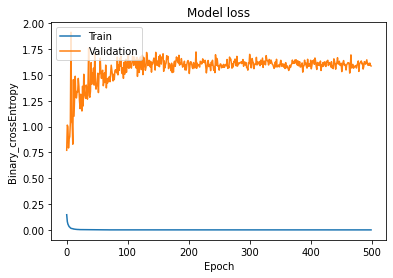

In [28]:
plt.plot(history.history['loss'])                                                                                                                                        
plt.plot(history.history['val_loss'])                                                                                                                                                                                                                                                     
plt.title('Model loss')                                                                                   
plt.ylabel('Binary_crossEntropy')                                                                                                                 
plt.xlabel('Epoch')                                                                      
plt.legend(['Train', 'Validation'], loc='upper left')          
plt.show()  

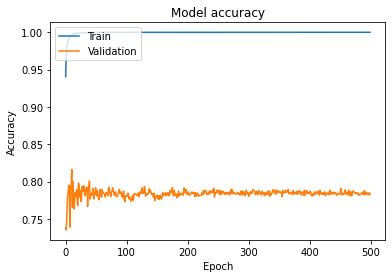

In [29]:
plt.plot(history.history['accuracy'])                                            
plt.plot(history.history['val_accuracy'])         
plt.title('Model accuracy')                           
plt.ylabel('Accuracy')                         
plt.xlabel('Epoch')                      
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [30]:
print('Lowest training loss: ', min(history.history['loss']))
print('Lowest validation loss: ', min(history.history['val_loss']))        
print('Highest training accuracy: ', max(history.history['accuracy']))
print('Highest validation accuracy: ', max(history.history['val_accuracy']))

Lowest training loss:  0.00011062547127949074
Lowest validation loss:  0.770520806312561
Highest training accuracy:  1.0
Highest validation accuracy:  0.8164251446723938
